<a href="https://colab.research.google.com/github/Alinejj/Alinejj/blob/main/PredictingStarsGalaxiesAndQuasars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Galaxies, stars, and quasars are the dazzling wonders of the universe that showcase its immense beauty and mystery.

Galaxies are sprawling cosmic cities, home to billions of stars, swirling gas, and emigmatic dark matter, all held together by gravity.

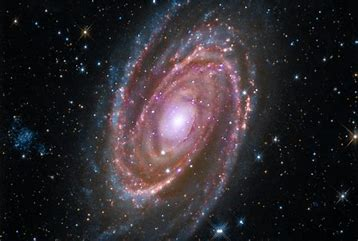

Stars, the brilliant engines of the cosmos, light up these galaxies, forging elements and creating the energy that powers life.

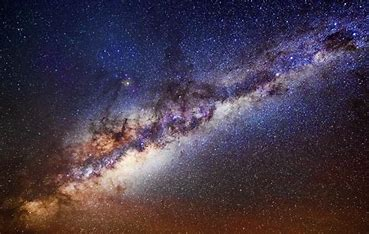

However, quasars, steal the show; cosmic beacons of unimaginable brightness, fueled by supermassive black holes devouring matter at the heart of distant galaxies.

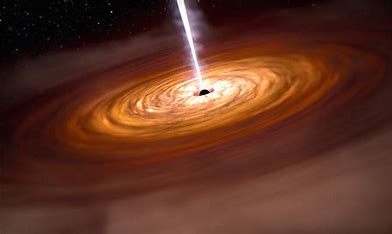

In this project, the aim is to predict if the dot in the night sky is a star, galaxy, or a quasar. The data set used is https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17

In [ ]:
#operating system functionality
import os

#data handling/linear algebra
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#data manipulation and model building
import tensorflow as tf
from tensorflow import keras

#data analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#measure classification performance
from sklearn.metrics import accuracy_score

#classification and regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

In [6]:

#import the dataset
from google.colab import files
uploaded = files.upload()

Saving star_classification.csv.zip to star_classification.csv (1).zip


In [21]:
#load the data
data = pd.read_csv("star_classification.csv.zip")

In [22]:
#display the first 5 rows
data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [23]:
#dimensions of the dataset
data.shape

(100000, 18)

Delete the columns of little use for our analysis, the object id columns.

In [24]:
#drop the columns
data.drop(['obj_ID'], axis=1, inplace=True)

In [25]:
#data after removing the columns
data.head(10)

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,QSO,1.424659,5026,55855,741
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,QSO,0.586455,11069,58456,113
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,GALAXY,0.477009,6183,56210,15
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,GALAXY,0.660012,6625,56386,719
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,STAR,-0.000008,2444,54082,232


In [26]:
data.shape

(100000, 17)

In [27]:
data.describe()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [28]:
#check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   alpha        100000 non-null  float64
 1   delta        100000 non-null  float64
 2   u            100000 non-null  float64
 3   g            100000 non-null  float64
 4   r            100000 non-null  float64
 5   i            100000 non-null  float64
 6   z            100000 non-null  float64
 7   run_ID       100000 non-null  int64  
 8   rerun_ID     100000 non-null  int64  
 9   cam_col      100000 non-null  int64  
 10  field_ID     100000 non-null  int64  
 11  spec_obj_ID  100000 non-null  float64
 12  class        100000 non-null  object 
 13  redshift     100000 non-null  float64
 14  plate        100000 non-null  int64  
 15  MJD          100000 non-null  int64  
 16  fiber_ID     100000 non-null  int64  
dtypes: float64(9), int64(7), object(1)
memory usage: 13.0+ MB


The class column has the 3 categories needed to identify if the target is a star, galaxy, or a quasar. In order to convert them into numeric data, Sklearn provides tools for encoding labels with a value between 0 and n-1 where n is the number of distinct labels.

In [29]:
le = LabelEncoder().fit(data['class'])
data['class'] = le.transform(data['class'])

In [30]:
#print the dataset after the changes
data.head(10)

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842
5,340.995121,20.589476,23.48827,23.33776,21.32195,20.25615,19.54544,8102,301,3,110,5.658977e+18,1,1.424659,5026,55855,741
6,23.234926,11.418188,21.46973,21.17624,20.92829,20.60826,20.42573,7773,301,2,462,1.246262e+19,1,0.586455,11069,58456,113
7,5.433176,12.065186,22.24979,22.02172,20.34126,19.48794,18.84999,7773,301,2,346,6.961443e+18,0,0.477009,6183,56210,15
8,200.290475,47.199402,24.40286,22.35669,20.61032,19.46490,18.95852,3716,301,5,108,7.459285e+18,0,0.660012,6625,56386,719
9,39.149691,28.102842,21.74669,20.03493,19.17553,18.81823,18.65422,5934,301,4,122,2.751763e+18,2,-0.000008,2444,54082,232


After lable encoding, galaxies have been labled as 0, quasars with 1, and stars with 2.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   alpha        100000 non-null  float64
 1   delta        100000 non-null  float64
 2   u            100000 non-null  float64
 3   g            100000 non-null  float64
 4   r            100000 non-null  float64
 5   i            100000 non-null  float64
 6   z            100000 non-null  float64
 7   run_ID       100000 non-null  int64  
 8   rerun_ID     100000 non-null  int64  
 9   cam_col      100000 non-null  int64  
 10  field_ID     100000 non-null  int64  
 11  spec_obj_ID  100000 non-null  float64
 12  class        100000 non-null  int64  
 13  redshift     100000 non-null  float64
 14  plate        100000 non-null  int64  
 15  MJD          100000 non-null  int64  
 16  fiber_ID     100000 non-null  int64  
dtypes: float64(9), int64(8)
memory usage: 13.0 MB


In [32]:
#train
X = data.drop('class', axis=1)
y = data['class']

Data scaling is needed in order to convert floating-point values from their range into a standarad range (0 and 1 or -1 to +1).  

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

In [34]:
X[:20]

array([[-4.34603584e-01,  4.25528706e-01,  5.97545987e-02,
         5.49261638e-02,  4.03961550e-01,  4.60074020e-02,
         3.93657668e-03, -4.45534513e-01,  0.00000000e+00,
        -9.52552725e-01, -7.18946946e-01,  2.28608657e-01,
         7.95572845e-02,  2.28632913e-01,  4.23203207e-01,
        -1.02134224e+00],
       [-3.39921434e-01,  3.63402270e-01,  8.80452678e-02,
         7.24561688e-02,  1.58440609e+00,  1.18509719e+00,
         9.28347300e-02,  1.86455534e-02,  0.00000000e+00,
         9.37920462e-01, -4.50509177e-01,  1.79791232e+00,
         2.77096198e-01,  1.79792394e+00,  1.42072864e+00,
        -8.18825036e-02],
       [-3.67250583e-01,  5.82712741e-01,  1.03326768e-01,
         6.71651675e-02,  5.19745322e-01,  1.50018697e-01,
         8.80798469e-03, -4.45534513e-01,  0.00000000e+00,
        -9.52552725e-01, -4.43798232e-01, -1.90036741e-01,
         9.24228290e-02, -1.90025346e-01,  1.85377163e-03,
        -5.51612374e-01],
       [ 1.66952317e+00, -1.24910526e

In [35]:
#30% test and 70% train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

<Axes: xlabel='class', ylabel='count'>

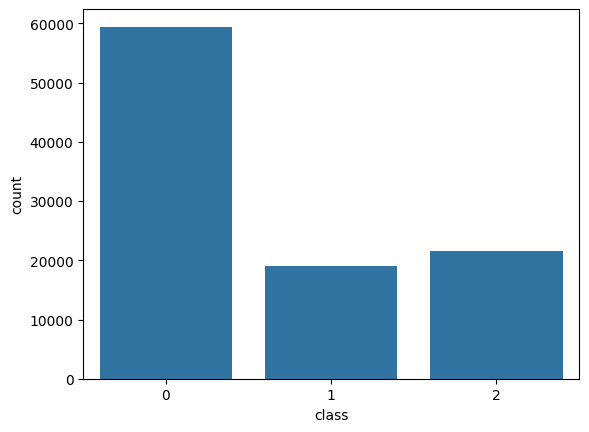

In [36]:
#check the nb of labels for each class of the dataset where galaxy is 0, quasar is 1, and star is 2
sns.countplot(x=data['class'])

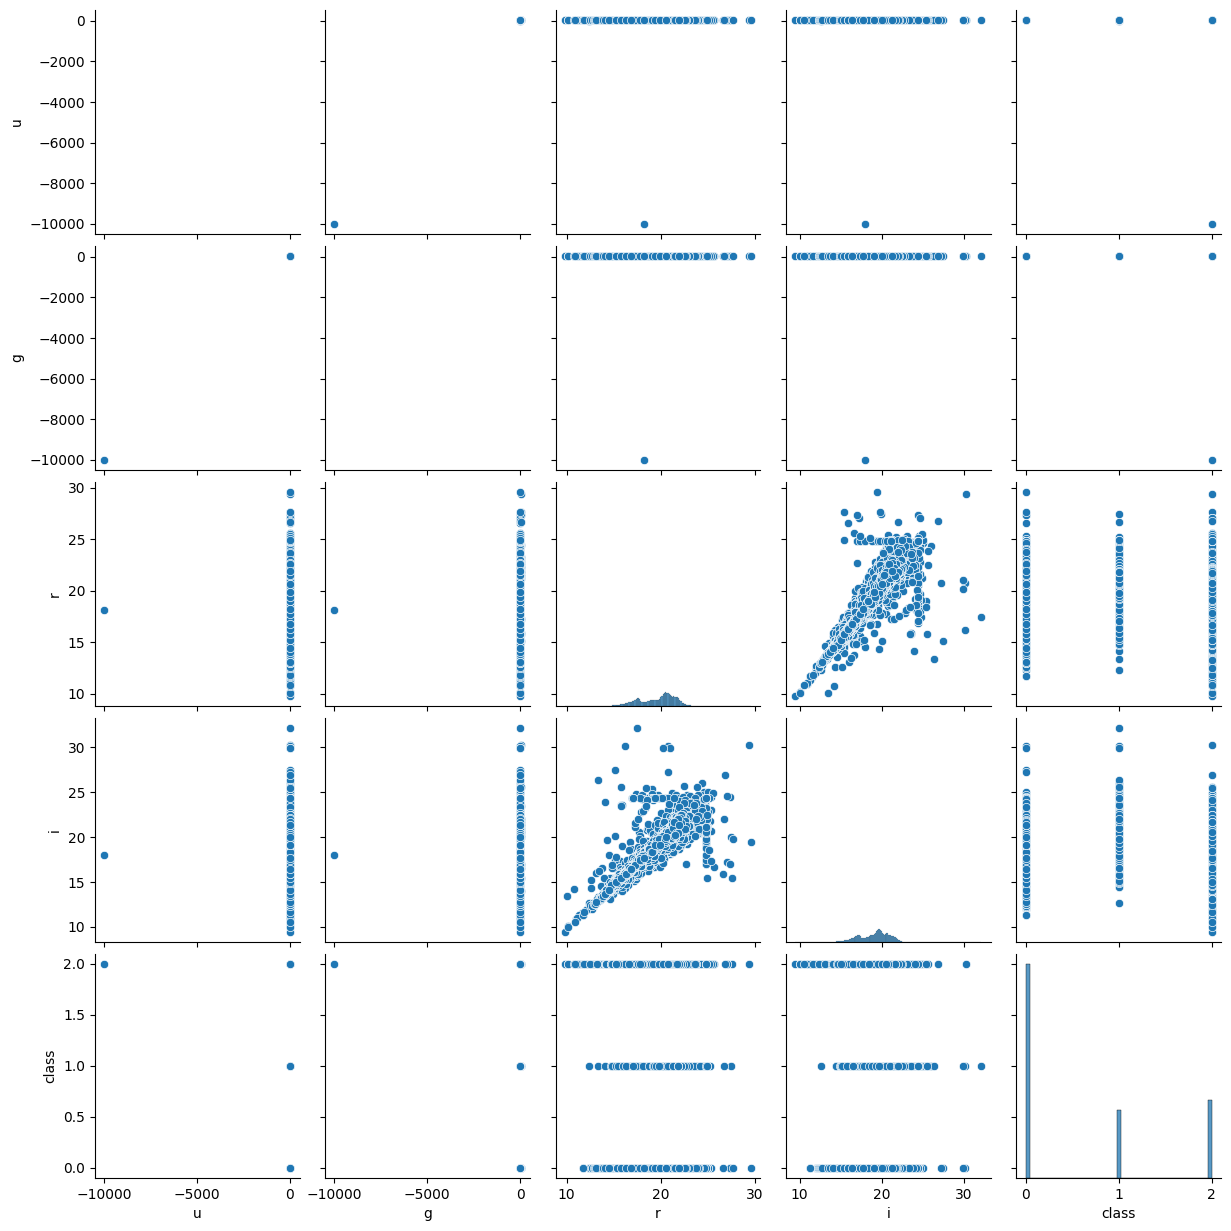

In [37]:
#u corresponds to ultraviolet, g for green, r for red, and i for infared
sns.pairplot(data[['u', 'g', 'r', 'i', 'class']])

Decision trees use multiple algorithms to decide to split a node into two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that the purity of the node increases with respect to the target variable. The decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

In [38]:
#decision tree
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

In [39]:
#logistic regression
LRClassifer = LogisticRegression()

In [40]:
#nearest neighbor classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

In [41]:
#fitting the models to the dataset
dtClassifer.fit(X_train, y_train)

LRClassifer.fit(X_train, y_train)

NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [42]:
#getting the prediction
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [43]:
#display the last 10 predictions on the test split

print(y_preds[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])

[1 0 0 1 2 0 1 2 0 0] 
 50360    1
97957    0
66018    1
37401    1
77344    2
77861    0
61685    1
39794    2
62088    0
54415    0
Name: class, dtype: int64

*******************************************************
[1 0 1 1 2 0 1 2 0 0] 
 50360    1
97957    0
66018    1
37401    1
77344    2
77861    0
61685    1
39794    2
62088    0
54415    0
Name: class, dtype: int64

*******************************************************
[1 0 1 1 2 0 1 2 0 0] 
 50360    1
97957    0
66018    1
37401    1
77344    2
77861    0
61685    1
39794    2
62088    0
54415    0
Name: class, dtype: int64


In [44]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Linear Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.98      0.94      0.96     18729
           1       0.80      0.94      0.86      4743
           2       1.00      0.99      1.00      6528

    accuracy                           0.95     30000
   macro avg       0.93      0.96      0.94     30000
weighted avg       0.96      0.95      0.95     30000


  Linear Regression -
                 precision    recall  f1-score   support

           0       0.97      0.96      0.96     17972
           1       0.88      0.95      0.91      5200
           2       1.00      0.95      0.97      6828

    accuracy                           0.96     30000
   macro avg       0.95      0.95      0.95     30000
weighted avg       0.96      0.96      0.96     30000


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.96      0.89      0.92     19274
           1       0.83      0.96      0.89      4879
     

In [45]:
from sklearn.tree import plot_tree, export_text

#function prediction
def predict_object_type(model, feature_values):
  prediction = model.predict([feature_values])[0]
  class_names = ['Star', 'Galaxy', 'Quasar']
  return class_names[prediction]


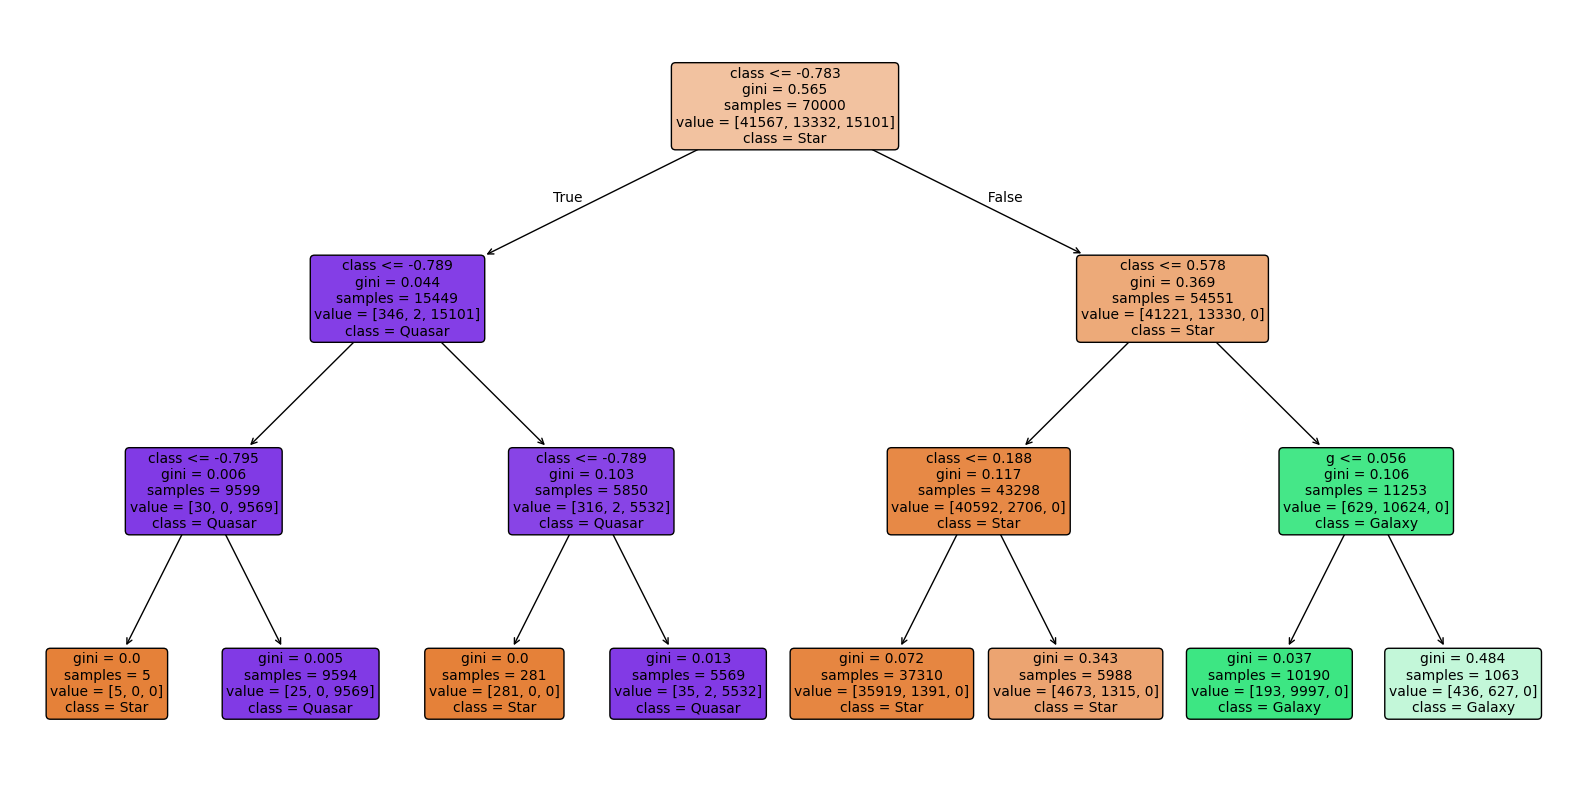

In [46]:
plt.figure(figsize=(20, 10))
plot_tree(dtClassifer,
          feature_names=data.columns[:-1],
          class_names=['Star', 'Galaxy', 'Quasar'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

In [47]:
tree_text = export_text(dtClassifer, feature_names=list(data.columns[:-1]))
print(tree_text)

|--- class <= -0.78
|   |--- class <= -0.79
|   |   |--- class <= -0.79
|   |   |   |--- class: 0
|   |   |--- class >  -0.79
|   |   |   |--- class: 2
|   |--- class >  -0.79
|   |   |--- class <= -0.79
|   |   |   |--- class: 0
|   |   |--- class >  -0.79
|   |   |   |--- class: 2
|--- class >  -0.78
|   |--- class <= 0.58
|   |   |--- class <= 0.19
|   |   |   |--- class: 0
|   |   |--- class >  0.19
|   |   |   |--- class: 0
|   |--- class >  0.58
|   |   |--- g <= 0.06
|   |   |   |--- class: 1
|   |   |--- g >  0.06
|   |   |   |--- class: 1

